In [2]:
import librosa
import librosa.display
import spectrogram
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
hop_length = 2048
win_length = 512
n_fft = 1024

In [4]:
test = spectrogram.generate_spec('PluckedStrings/Harp/pizzicato_bartok/Hp-pizz_bartok-G3-ff-N-N.wav', hop_length = 2048, 
                win_length = 512, n_fft = n_fft)

<AxesSubplot:>

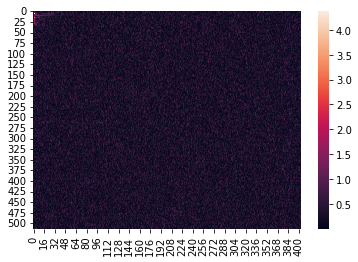

In [5]:
sns.heatmap(test)

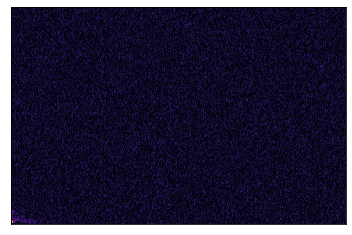

In [6]:
librosa.display.specshow(test, hop_length=hop_length)

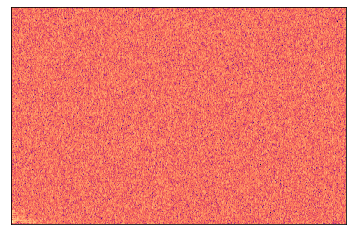

In [7]:
librosa.display.specshow(librosa.amplitude_to_db(test), hop_length=hop_length)

In [8]:
test, _ = librosa.load('../data/_OrchideaSOL2020_release/OrchideaSOL2020/PluckedStrings/Harp/pizzicato_bartok/Hp-pizz_bartok-G3-ff-N-N.wav', 
                    sr = None)

In [9]:
test.shape

(826215,)

(0.0, 1000.0)

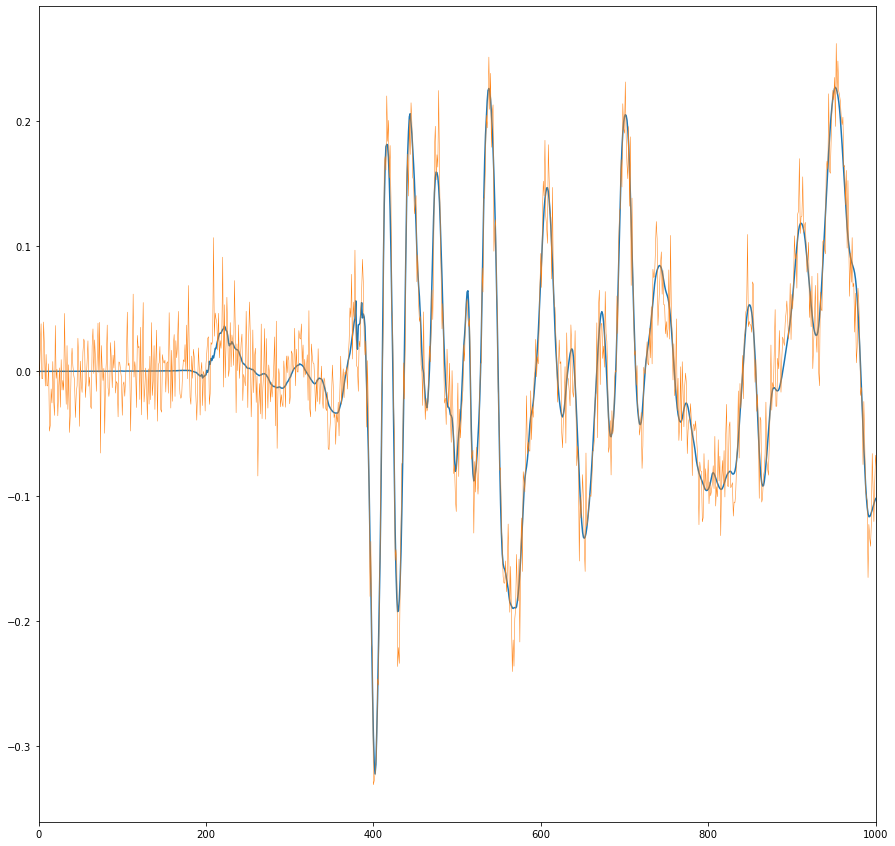

In [10]:

plt.figure(figsize = (15, 15))
plt.plot(test)
plt.plot(spectrogram.add_noise(test), linewidth = 0.5)
plt.xlim((0, 1000))

In [11]:
spectrogram.add_noise

<function spectrogram.add_noise(spec, plot=False, seed=42)>

In [12]:
import inspect
print(inspect.getsource(spectrogram.add_noise))

def add_noise(spec, plot = False, seed = 42):
    '''
    >>> test = np.ndarray((3, 5))
    >>> add_noise(test).shape
    (3, 5)
    '''
    np.random.seed(seed)
    output = spec + np.random.normal(0, 0.025, size = spec.shape)
    if plot == True:
        plt.plot(spec)
        plt.plot(range(len(output)), output)
    return output



(0.0, 5000.0)

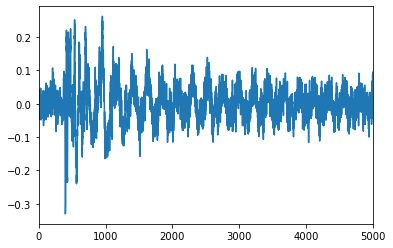

In [13]:
noise_sample = spectrogram.add_noise(test)
plt.plot(noise_sample)
plt.xlim(0, 5000)

In [19]:
spec_sample = spectrogram.generate_spec('../data/_OrchideaSOL2020_release/OrchideaSOL2020/PluckedStrings/Harp/pizzicato_bartok/Hp-pizz_bartok-G3-ff-N-N.wav', 
                                            full_path = True, win_length = win_length, 
                                            hop_length = hop_length, n_fft = n_fft)

In [18]:
print(inspect.getsource(spectrogram.generate_spec))

def generate_spec(path, sr = None, full_path = False, noise = True, 
                    **kwargs):
    '''
    Generate spectrogram's numpy nd.array base on directory.
    The first dimension contains the frequency bins, whereas the second
    dimension represents the windows bin.

    The dtype of the numpy array is of complex64 type. The magniudes
    represent the magnitude of the frequency bins, and the angles represent
    the phase of corresponding frequency.

    Input: String, path to audio file.
    Output: 2 dimensions nd.array.
    '''
    rel_path = glob.glob('../data/**[!MACOSC]/*OrchideaSOL2020/', recursive=True)[0]
    if full_path == False:
        true_path = rel_path + path
    else:
        true_path = path
    file, sr = librosa.load(true_path, sr=sr)
    if noise == True:
        file = add_noise(file)
    y = librosa.stft(file, **kwargs)
    return np.abs(y)



In [33]:
spec_sample.shape

(513, 404)

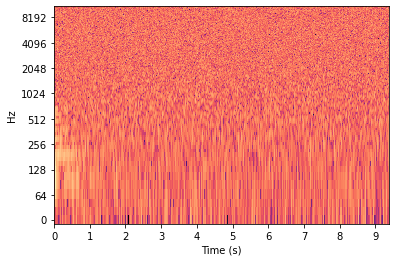

In [25]:
librosa.display.specshow(librosa.amplitude_to_db(spec_sample), y_axis='log', x_axis = 's')

In [60]:
def mask_spec(arr, inplace = False):
    loop = random.randint(1, 2)
    tmp = arr.copy()
    for i in range(loop):
        start = random.randint(0, arr.shape[1])
        duration = random.randint(25, 60)
        if inplace == True:
            arr[:, start:start + duration] = 0
        else:
            tmp[:, start:start+duration] = 0
    freq_loop = random.randint(1, 3)
    for freq in range(freq_loop):
        start = random.randint(0, arr.shape[0])
        duration = random.randint(25, 60)
        if inplace == True:
            arr[start:start + duration, :] = 0
        else:
            tmp[start:start + duration, :] = 0

    return None if inplace == True else tmp


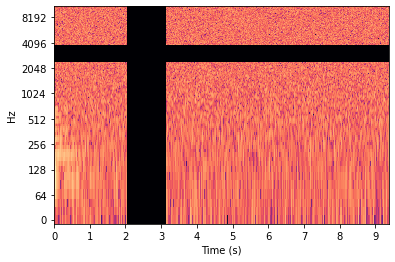

In [70]:
librosa.display.specshow(librosa.amplitude_to_db(mask_spec(spec_sample)), y_axis='log', x_axis = 's')

In [36]:
import random
print(random.randint(0, 9))

6


In [32]:
print(random.randint.__doc__)

Return random integer in range [a, b], including both end points.
        


In [35]:
random.randint.__

<bound method Random.randint of <random.Random object at 0x560496326d30>>